Grabbing the latest chips that are being worked on.

In [1]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [2]:
os.environ["AWS_NO_SIGN_REQUEST"] = "YES"

In [3]:
df_image_calc = gpd.read_file('s3://opera-calval-database-dswx/image_calc.geojson')
df_image_calc.dropna(subset='geometry', inplace=True)
df_image_calc = df_image_calc.sort_values(by=['image_name', 'upload_date'], ascending=True)
df_image_calc = df_image_calc.groupby('image_name').tail(1)
df_image_calc.head()

,bucket,calc_type,calculated_by,image_calc_name,image_name,notes,oversight_level,previous_name,processing_level,public,reviewed_by,s3_keys,upload_date,version,water_strata,water_stratum,geometry
12,opera-calval-database-dswx,Manual classification,Alexander Handwerger,20210906_101112_28_225a_classification_v0,20210906_101112_28_225a,Supervised Classification using Semiautomatic ...,None,None,Intermediate,True,None,data/site/3_28/image/20210906_101112_28_225a/i...,20220916_154315,0.0,NaN,NaN,"POLYGON ((-0.04389 43.05233, -0.04389 43.16776..."
20,opera-calval-database-dswx,Manual classification,Alexander Handwerger,20210922_171337_39_2420_classification_v1.0,20210922_171337_39_2420,Manual Edit of Supervised Classification.,None,20210922_171337_39_2420_classification_v0,Intermediate,True,None,data/site/2_26/image/20210922_171337_39_2420/i...,20220920_172249,1.0,NaN,1.0,"POLYGON ((-109.07831 38.43146, -109.07831 38.4..."
7,opera-calval-database-dswx,Manual Edit of Classification,Alexander Handwerger,20210924_000522_94_2421_class_edit,20210924_000522_94_2421,None,None,20210924_000522_94_2421_class,Intermediate,True,None,data/site/4_42/image/20210924_000522_94_2421/i...,20220805_131950,NaN,NaN,NaN,"POLYGON ((139.47770 -16.88868, 139.43688 -17.0..."
5,opera-calval-database-dswx,Manual Edit of Classification,Alexander Handwerger,20210924_082025_48_2424_class_edit,20210924_082025_48_2424,None,None,20210924_082025_48_2424_class,Intermediate,True,None,data/site/4_37/image/20210924_082025_48_2424/i...,20220805_124214,NaN,NaN,NaN,"POLYGON ((28.20956 -9.14523, 28.17025 -9.34005..."
8,opera-calval-database-dswx,TEST,Matthew Bonnema,20210928_141837_16_2407_classification_v0,20210928_141837_16_2407,This is a fake entry for testing. Delete when ...,None,None,Intermediate,True,None,data/site/2_1/image/20210928_141837_16_2407/im...,20220916_115719,0.0,NaN,NaN,"POLYGON ((-60.62407 -14.76471, -60.66244 -14.9..."


In [4]:
df_image_calc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_48342/1878483146.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_image_calc.geometry.buffer(1).plot()


<AxesSubplot:>

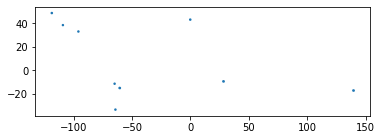

In [5]:
df_image_calc.geometry.buffer(1).plot()

In [6]:
df_image_calc.to_file('image_calc_current.geojson', driver='GeoJSON')

Text(0, 0.5, 'Frequency')

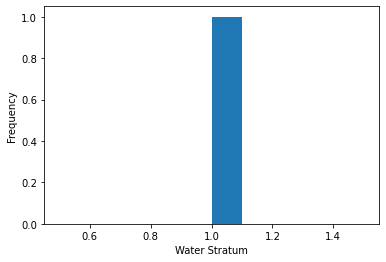

In [15]:
plt.hist(df_image_calc.water_stratum)
plt.xlabel('Water Stratum')
plt.ylabel('Frequency')

In [18]:
n = df_image_calc.shape[0]
f'We have submitted {n} images currently'

'We have submitted 9 images currently'